 ### <br><b> Introduction to data analysis_TP2</b>

-->This document can't be modified. You don't have the authority to save changes to this notebook. ***So be sure you download your work before exiting!***  (use the above **download** buttun)

Our objective here is to introduce you to xarray; an open source project and Python package that makes working with labelled multi_dimensional arrays simple, efficient, and fun!

We will do that with a data set of climate variables from GRENOBLE-ST GEOIRS AEROPORT , which are downloaded from METEO FRANCE site.
>In case your curiosity strikes you:
    <u><br>https://donneespubliques.meteofrance.fr/</u>

As getting the data through this interface is kind of clumsy, a version is available from the following file: /data/Data.xslx

This datafile contains following data:

> <u>Variables:</u>
    <br>- max/min/mean temperature
    <br>- total precipitation 
  <br><u>Temporal coverage: </u>
        <br>1968/01/01-2022/01/31

    

<br><b>Tasks:</b>

> 1) Calculate the seasonal annual averages of the variables over the available period (cold season: ONDJFM and warm season: AMJJAS )
  2) Plot the seasonal annual time series of the variables
  3) Calculate the seasonal trends and significance using student t-test 
  4) Calculate the correlation between max and min temperatures 
  5) Indicate the snowy days (Temperature<0, and precipiataion>0) and plot the time series 



### >> <b> Load Libraries</b>


In [12]:
# to render your plots in your notebook %matplotlib inline 
%matplotlib inline 
import matplotlib.pyplot as plt # for plots 
import numpy as np # mathematical functions
import xarray as xr 
import pandas as pd # 

### >> <b> Load data</b>
It is always good to take a look at the file before opening it with python. 
</br>This can be done by opening it with excel, or with a text editor, or as we will do here, from the command line:

</br>**head**: outputs the first few lines of a text file
</br>**tail**: outputs the last few lines of a text file
</br>**more**: outputs all the text file (very bad if too big a file...)
</br>**cut -c-80**: outputs the first 80 characters of every line of a text file

In [13]:
# To execute command line statements directly from the notebook we use "! prefix". "%% bash" could be used also
! tail /home/fjomaa/TP_master/Data/Data.csv

38384001,20220122,-0.1,-4.1,3.9,0
38384001,20220123,0.6,-0.6,3.5,0
38384001,20220124,-0.2,-5.6,8.4,0
38384001,20220125,0.5,-5.4,10.1,0
38384001,20220126,-0.3,-6.1,7.5,0
38384001,20220127,-2,-4,2.3,0
38384001,20220128,-0.1,-3.5,1.9,0
38384001,20220129,0.5,-0.9,3.8,0
38384001,20220130,4.5,-0.3,7.2,0
38384001,20220131,3.1,-0.9,6,1.4


**1. csv**
> Open a csv file using pandas. Pandasas is widely used for analysing any dataset that most chemists (or biologists) would naturally handle in excel. 

In [14]:
## read csv file
df = pd.read_csv('/home/fjomaa/TP_master/Data/Data.csv')
df.head() #print the first 5 rows 

,Station,Date,mean_T,min_T,max_T,Precipitation
0,38384001,19680101,-0.7,-5.0,2.3,12.8
1,38384001,19680102,0.2,-0.8,2.0,6.9
2,38384001,19680103,-2.3,-5.2,2.8,5.2
3,38384001,19680104,1.6,-0.9,3.2,4.5
4,38384001,19680105,1.4,0.2,7.8,14.4


>For working with labeled multi-dimensional arrays it's always a good choice to work with xarray. So here we convert the csv format into xarray

In [15]:
da=df.to_xarray().drop('Date').rename({'index':'time'})
time=pd.date_range('1/1/1968','31/1/2022',freq='D')
da['time']=time

In [16]:
da

<xarray.Dataset>
Dimensions:        (time: 19755)
Coordinates:
  * time           (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31
Data variables:
    Station        (time) int64 38384001 38384001 38384001 ... 38384001 38384001
    mean_T         (time) float64 -0.7 0.2 -2.3 1.6 1.4 ... -0.1 0.5 4.5 3.1
    min_T          (time) float64 -5.0 -0.8 -5.2 -0.9 ... -3.5 -0.9 -0.3 -0.9
    max_T          (time) float64 2.3 2.0 2.8 3.2 7.8 ... 2.3 1.9 3.8 7.2 6.0
    Precipitation  (time) float64 12.8 6.9 5.2 4.5 14.4 ... 0.0 0.0 0.0 0.0 1.4

**2. netcdf**

> NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction.

In [17]:
#Saving a netcdf file
#da.to_netcdf('/home/fjomaa/TP_master/Data.nc')

### >> <b> Get started with Xarray</b>

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 
Then a variable consists of: 

* dims: A tuple of dimension names.
* data: The N-dimensional array (typically, a NumPy or Dask array) storing the Variable’s data. It must have the same number of dimensions as the length of dims.
* attrs: An ordered dictionary of metadata associated with this array.
* encoding: Another ordered dictionary used to store information about how these variable’s data is represented on disk. 


In [18]:
# Open the netcdf file using xarray 
# Don't forget to change the file path ;)
da=xr.open_dataset('/home/fjomaa/TP_master/Data/Data.nc')
da

<xarray.Dataset>
Dimensions:        (time: 19755)
Coordinates:
  * time           (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31
Data variables:
    Station        (time) int64 ...
    mean_T         (time) float64 ...
    min_T          (time) float64 ...
    max_T          (time) float64 ...
    Precipitation  (time) float64 ...

In [19]:
da.attrs
da.encoding
da.dims
da.coords

Coordinates:
  * time     (time) datetime64[ns] 1968-01-01 1968-01-02 ... 2022-01-31

**Select Variables:**

In [21]:
precip=da.Precipitation
meanT=da.mean_T
minT=da.min_T
maxT=da.max_T

**Select period:**

In [ ]:
da.sel(time=slice('1979-01-01','2022-01-01'))

In [22]:
da.where((da['time.year']>2017),drop=True)

<xarray.Dataset>
Dimensions:        (time: 1492)
Coordinates:
  * time           (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2022-01-31
Data variables:
    Station        (time) float64 3.838e+07 3.838e+07 ... 3.838e+07 3.838e+07
    mean_T         (time) float64 6.3 5.0 7.6 8.5 10.9 ... -2.0 -0.1 0.5 4.5 3.1
    min_T          (time) float64 3.7 2.3 5.0 4.8 7.4 ... -3.5 -0.9 -0.3 -0.9
    max_T          (time) float64 9.1 7.2 13.3 13.9 16.1 ... 2.3 1.9 3.8 7.2 6.0
    Precipitation  (time) float64 2.6 0.0 16.1 3.4 0.2 ... 0.0 0.0 0.0 0.0 1.4

**Compute Climatology:**

In [ ]:
precip.groupby('time.month').mean()
precip.groupby('time.year').mean()

**Plots**

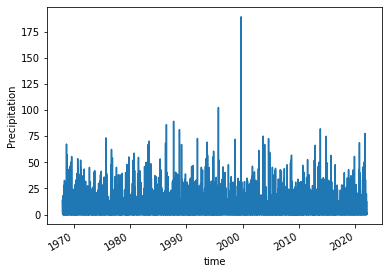

In [21]:
precip.plot()

## Now that we've got the hang of xarray, let's start analysing our data

<br><b>Tasks:</b>

> 1) Calculate the seasonal annual averages of the variables over the available period (cold season: ONDJFM and warm season: AMJJAS ) use **.where**
  2) Plot the seasonal annual time series of the variables use **matplotlib**
  3) Calculate the seasonal trends and significance using student t-test use **scipy linear regression** for trend and **scipy ttest_rel**
  4) Calculate the correlation between max and min temperatures use **numpy**
  5) Indicate the snowy days (Temperature<0, and precipiataion>0) and plot the time series 